<a href="https://colab.research.google.com/github/saranyaguhanathan/community/blob/main/project_customer_conversion_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Conversion Prediction**
Problem Statement:
You are working for a new-age insurance company and employ
mutiple outreach plans to sell term insurance to your
customers. Telephonic marketing campaigns still remain one of
the most effective way to reach out to people however they
incur a lot of cost. Hence, it is important to identify the
customers that are most likely to convert beforehand so that
they can be specifically targeted via call. We are given the
historical marketing data of the insurance company and are
required to build a ML model that will predict if a client will
subscribe to the insurance.

Data
The historical sales data is available as a compressed file here.
Features:
● age (numeric)
● job : type of job
● marital : marital status
● educational_qual : education status
● call_type : contact communication type
● day: last contact day of the month (numeric)
● mon: last contact month of year
● dur: last contact duration, in seconds (numeric)
● num_calls: number of contacts performed during this
campaign and for this client
 prev_outcome: outcome of the previous marketing
campaign (categorical:
"unknown","other","failure","success")
Output variable (desired target):
● y - has the client subscribed to the insurance?
Minimum Requirements
It is not sufficient to just fit a model - the model must be
analysed to find the important factors that contribute towards
the conversion rate. AUROC must be used as a metric to
evaluate the performance of the models.

Data
The historical sales data is available as a compressed file here.
Features:

● age (numeric)
● job : type of job
● marital : marital status
● educational_qual : education status
● call_type : contact communication type
● day: last contact day of the month (numeric)
● mon: last contact month of year
● dur: last contact duration, in seconds (numeric)
● num_calls: number of contacts performed during this
campaign and for this client
prev_outcome: outcome of the previous marketing
campaign (categorical:
"unknown","other","failure","success")
Output variable (desired target):
● y - has the client subscribed to the insurance?

Minimum Requirements

It is not sufficient to just fit a model - the model must be
analysed to find the important factors that contribute towards
the conversion rate. AUROC must be used as a metric to
evaluate the performance of the models.

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
df=pd.read_csv("train(1).csv")
df.head(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,no
8,58,retired,married,primary,unknown,5,may,50,1,unknown,no
9,43,technician,single,secondary,unknown,5,may,55,1,unknown,no


**Data Cleaning**

In [120]:
df.shape

(45211, 11)

In [121]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [122]:
# features
# continuous variable --- age,day,dur,num_calls 4
# categorical variable --- job,marital,education_qual,call_tpe,mon,prev_outcomes,y 7
# target variable --- y 

In [123]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [124]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [125]:
# To check for outliers
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [126]:
df=df.drop_duplicates()

In [127]:
# inter quanrile region
iqr=df.age.quantile(0.75)-df.age.quantile(0.25)
upper_thershold=df.age.quantile(0.75)+(1.5*iqr) # q3+(1.5*iqr)
lower_thershold=df.age.quantile(0.25)-(1.5*iqr) # q1-(1.5*iqr)
upper_thershold,lower_thershold
# data values greater than upper_thershold are outlier values 
# data values lesser than lower_thershold are outlier values 


(70.5, 10.5)

In [128]:
# values greater than q3+(1.5*iqr) ---> outliers values
# values less than q1-(1.5*iqr)  ---->outliers values

In [129]:
# to remove outliers we are cliping the data
df.age=df.age.clip(10.5,70.5)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [130]:
# inter quanrile region
iqr=df.dur.quantile(0.75)-df.dur.quantile(0.25)
upper_thershold=df.dur.quantile(0.75)+(1.5*iqr) # q3+(1.5*iqr)
lower_thershold=df.dur.quantile(0.25)-(1.5*iqr) # q1-(1.5*iqr)
upper_thershold,lower_thershold
# data values greater than upper_thershold are outlier values 
# data values lesser than lower_thershold are outlier values 


(643.0, -221.0)

In [131]:
df.dur=df.dur.clip(643.0,-221.0)

In [132]:
df['age'].unique()

array([58. , 44. , 33. , 47. , 35. , 28. , 42. , 43. , 41. , 29. , 53. ,
       57. , 51. , 45. , 60. , 56. , 32. , 25. , 40. , 39. , 52. , 46. ,
       36. , 49. , 59. , 37. , 50. , 54. , 55. , 48. , 24. , 38. , 31. ,
       30. , 27. , 34. , 23. , 26. , 61. , 22. , 21. , 20. , 66. , 62. ,
       70.5, 67. , 70. , 65. , 68. , 64. , 69. , 19. , 63. , 18. ])

In [133]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [134]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [135]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [136]:
# here,in job column we have 288 unknown, so we can impute it with mode of that column( as that column is categorical)
df['job']=df['job'].replace("unknown","blue-collar")

In [137]:
df["job"].value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [138]:
df['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [139]:
df['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [140]:
df['education_qual']=df['education_qual'].replace("unknown","secondary")

In [141]:
df['education_qual'].value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

In [142]:
df['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [143]:
# here, from above prev_outcome column has unkown around 36,953 ... 
# we have a huge number on unkown because in previous outcome column it stores previous calls result that is whether the person
# taken insurance or not , what is the outcome of the previuos call... 
# one more important side is for most of the customers that could be their first call...( before that insurance call team doesnt called them )

# so, it is logically not correct to impute it...

In [144]:
df['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [145]:
# in call_type column 'unknown' could be other means of contacting the customer (public canvas,house visit...)

In [146]:
df['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [147]:
# Encoding target variable to find percentage of conversion 
df["target"]=df['y'].map({"yes":1,"no":0})

In [148]:
df.groupby('prev_outcome')['target'].mean()*100

prev_outcome
failure    12.609671
other      16.684783
success    64.725347
unknown     9.162991
Name: target, dtype: float64

In [149]:
# from the above insights, we can conclude that if previous outcome is "failure",then it is only 12% chance to convert that customer 
# or to convince them to take insurance
# if "success" then there will be 64% of chance to convert them.


In [150]:
df.describe()

,age,day,dur,num_calls,target
count,45205.000000,45205.00000,45205.00000,45205.000000,45205.000000
mean,40.869052,15.80688,234.95620,2.763898,0.117000
std,10.395247,8.32234,176.75476,3.098189,0.321424
min,18.000000,1.00000,0.00000,1.000000,0.000000
25%,33.000000,8.00000,103.00000,1.000000,0.000000
50%,39.000000,16.00000,180.00000,2.000000,0.000000
75%,48.000000,21.00000,319.00000,3.000000,0.000000
max,70.500000,31.00000,643.00000,63.000000,1.000000


[]

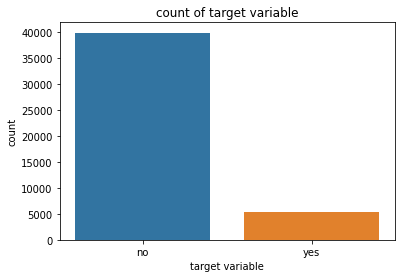

In [151]:
sns.countplot(x=df.y,data=df)
plt.xlabel("target variable")
plt.title("count of target variable")
plt.plot()

In [152]:
# so from the above plot , we can conclude this is a imbalaced data, nearly 40,000 rows are no and 6000 rows are yes.

**Exploratory Data Analysis**

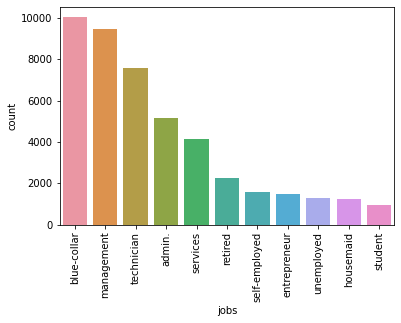

In [153]:
# Exploratory Data Analysis
df_job=pd.DataFrame(df.job.value_counts()).sort_values("job",ascending=False).reset_index()
df_job.rename(columns={"index":"jobs","job":"count"},inplace=True)
bar=sns.barplot(x=df_job['jobs'],y=df_job["count"],data=df_job)
bar.tick_params(axis="x",rotation=90)

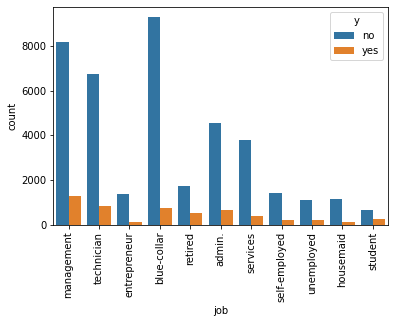

In [154]:
job1=sns.countplot(data=df,x="job",hue="y")
job1.tick_params(axis="x",rotation=90)

<AxesSubplot:ylabel='job'>

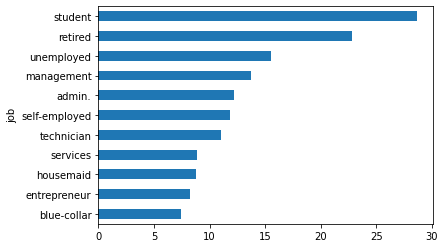

In [155]:
(df.groupby('job')['target'].mean()*100).sort_values().plot(kind="barh")

<AxesSubplot:ylabel='education_qual'>

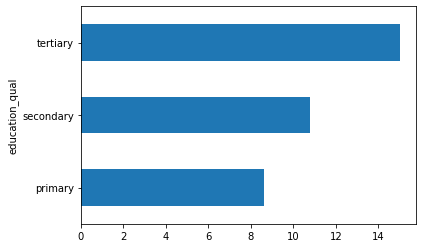

In [156]:
(df.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind="barh")

<AxesSubplot:ylabel='prev_outcome'>

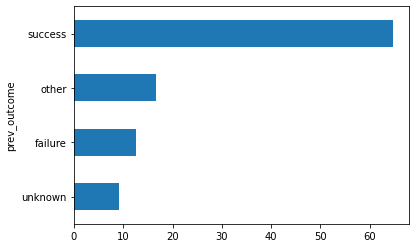

In [157]:
(df.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind="barh")

<AxesSubplot:ylabel='call_type'>

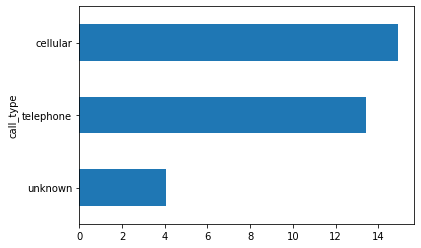

In [158]:
(df.groupby('call_type')['target'].mean()*100).sort_values().plot(kind="barh")

<AxesSubplot:ylabel='mon'>

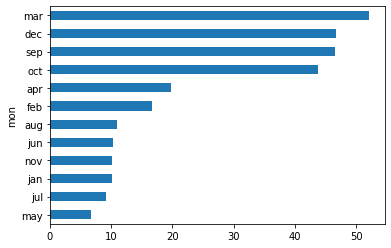

In [159]:
(df.groupby('mon')['target'].mean()*100).sort_values().plot(kind="barh")

<AxesSubplot:ylabel='marital'>

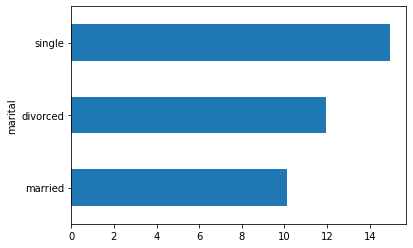

In [160]:
(df.groupby('marital')['target'].mean()*100).sort_values().plot(kind="barh")

In [161]:
# Insights from EDA
# 6 categorical variable 1.job,2.Education_qualification,3.previous outcome,4.month,5.marital status 6.call_type
# they play a vital role in converting the customer to buy insurance , all of theses feature are in very important

<AxesSubplot:ylabel='day'>

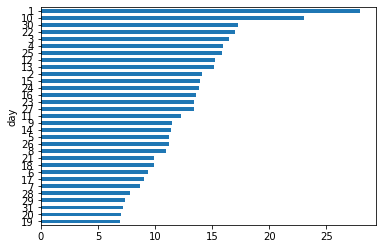

In [162]:
(df.groupby('day')['target'].mean()*100).sort_values().plot(kind="barh")

<AxesSubplot:xlabel='y', ylabel='age'>

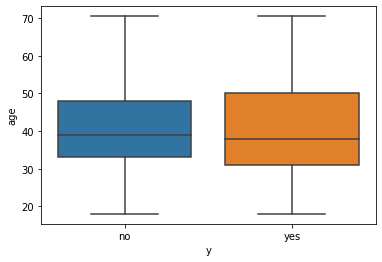

In [163]:
sns.boxplot(data=df,x='y',y='age')

<AxesSubplot:xlabel='y', ylabel='num_calls'>

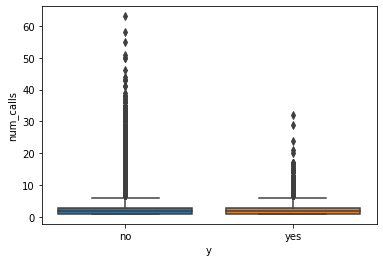

In [164]:
sns.boxplot(data=df,x='y',y='num_calls')

<AxesSubplot:xlabel='y', ylabel='dur'>

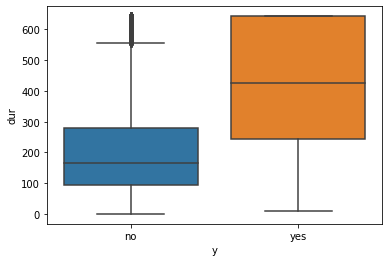

In [165]:
sns.boxplot(data=df,x='y',y='dur')

Class 0: 39916
Class 1: 5289
Proportion of class 0 is  88.3 %


<AxesSubplot:title={'center':'Count(target)'}>

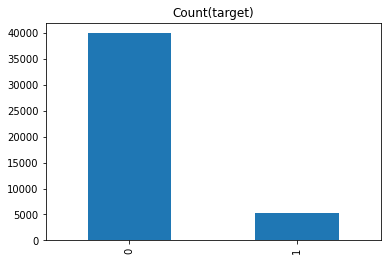

In [166]:
target_count=df.target.value_counts()
print('Class 0:',target_count[0])
print("Class 1:",target_count[1])
print("Proportion of class 0 is ",round(target_count[0]*100/(target_count[1]+target_count[0]),2),'%')
target_count.plot(kind='bar',title='Count(target)')

**Encoding**

In [167]:
# As we noticied some relationship between categorical feature and target variable,(there is some order in data)
# we Label encoding for all the categorical column
# job
df["job"] = df["job"].map({"student":0,"housemaid":1,"unemployed":2,"entrepreneur":3,"self-employed":4,"retired":5,"services":6,
                           "admin.":7,"technician":8,"management":9,"blue-collar":10})    


In [168]:
df['job']

0         9
1         8
2         3
3        10
4        10
         ..
45206     8
45207     5
45208     5
45209    10
45210     3
Name: job, Length: 45205, dtype: int64

In [169]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
target            0
dtype: int64

In [170]:
# Education qualification
df['education_qual']=df['education_qual'].map({"primary":0,"secondary":1,"tertiary":2})

In [171]:
# marital status
df['marital']=df['marital'].map({"married":0,"divorced":1,"single":2})

In [172]:
# previous outcome
df['prev_outcome']=df['prev_outcome'].map({"unknown":0,"failure":1,"other":2,"success":3})

In [173]:
# call_type
df['call_type']=df['call_type'].map({"unknown":0,"telephone":1,"cellular":2})

In [174]:
# month
df['mon']=df['mon'].map({"jan":0,"feb":1,"mar":2,"apr":3,"may":4,"jun":5,"jul":6,"aug":7,"sep":8,"oct":9,"nov":10,"dec":11})

In [175]:
df=df.drop(columns='y')

In [176]:
df.head(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58.0,9,0,2,0,5,4,261.0,1,0,0
1,44.0,8,2,1,0,5,4,151.0,1,0,0
2,33.0,3,0,1,0,5,4,76.0,1,0,0
3,47.0,10,0,1,0,5,4,92.0,1,0,0
4,33.0,10,2,1,0,5,4,198.0,1,0,0
5,35.0,9,0,2,0,5,4,139.0,1,0,0
6,28.0,9,2,2,0,5,4,217.0,1,0,0
7,42.0,3,1,2,0,5,4,380.0,1,0,0
8,58.0,5,0,0,0,5,4,50.0,1,0,0
9,43.0,8,2,1,0,5,4,55.0,1,0,0


In [177]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
target            0
dtype: int64

In [178]:
df.describe()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
count,45205.000000,45205.000000,45205.000000,45205.000000,45205.000000,45205.00000,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.869052,7.368919,0.680964,1.142661,1.359805,15.80688,5.144586,234.95620,2.763898,0.290101,0.117000
std,10.395247,2.592517,0.884900,0.652213,0.897927,8.32234,2.408153,176.75476,3.098189,0.698508,0.321424
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.00000,1.000000,0.000000,0.000000
25%,33.000000,6.000000,0.000000,1.000000,0.000000,8.00000,4.000000,103.00000,1.000000,0.000000,0.000000
50%,39.000000,8.000000,0.000000,1.000000,2.000000,16.00000,5.000000,180.00000,2.000000,0.000000,0.000000
75%,48.000000,9.000000,2.000000,2.000000,2.000000,21.00000,7.000000,319.00000,3.000000,0.000000,0.000000
max,70.500000,10.000000,2.000000,2.000000,2.000000,31.00000,11.000000,643.00000,63.000000,3.000000,1.000000


In [179]:
# so , dataset is completely cleaned and encoded, ready for modeling.

In [180]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'target'],
      dtype='object')

# **splitting the dataset**

In [181]:
x=df.loc[:,['age','job','marital','education_qual','call_type','day','mon','dur','num_calls','prev_outcome']].values # select all the rows and select all columns except the last column as my feature
y=df.loc[:,'target'].values # target --- target as arrays


In [182]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=77)


In [183]:
x_train

array([[ 34.,   4.,   2., ..., 202.,   1.,   0.],
       [ 38.,   6.,   2., ...,  41.,   2.,   1.],
       [ 56.,   5.,   0., ..., 226.,   1.,   0.],
       ...,
       [ 56.,   5.,   0., ..., 271.,   2.,   3.],
       [ 49.,   9.,   0., ..., 255.,   2.,   0.],
       [ 30.,  10.,   0., ...,  48.,   1.,   0.]])

In [184]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [185]:
# We will also create a 2-dimensional plot function, plot_2d_space, to see the data distribution
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

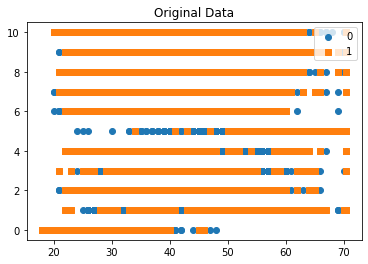

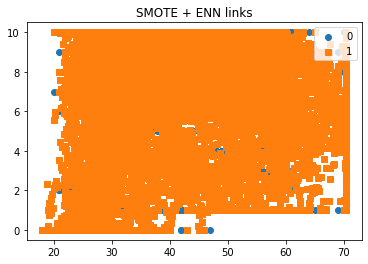

In [186]:
# As the data is not balanced, In order to build good model,we are going to balance the train dataset(after splitting) 
from imblearn.combine import SMOTEENN

plot_2d_space(x, y, 'Original Data')

smt = SMOTEENN(sampling_strategy='all')
x_smt, y_smt = smt.fit_resample(x_train, y_train)

plot_2d_space(x_smt, y_smt, 'SMOTE + ENN links')

In [187]:
x_train=x_smt
y_train=y_smt

In [188]:
#Normalizing/Scaling the data
from sklearn.preprocessing import StandardScaler # importing the requied function
scaler =StandardScaler() #initials
scaler.fit(x_train) # find the values of mu and sigma
x_train =scaler.transform(x_train)
x_test = scaler.transform(x_test) #only transform the test dataset,dont fit it


In [189]:
# as this is classification problem, we are going apply set of classifiation algorithms


**Model Building**

In [190]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model 
logistic_regression= LogisticRegression() #initialise the required package
logistic_regression.fit(x_train,y_train) #magic happens - best values of betas - training/learning happens here
y_pred=logistic_regression.predict(x_test)


In [191]:
#logistic_regression.coef_
y_pred


array([0, 0, 0, ..., 0, 0, 1])

In [192]:
logistic_regression.predict_proba(x_test)

array([[0.61929833, 0.38070167],
       [0.9073893 , 0.0926107 ],
       [0.99400873, 0.00599127],
       ...,
       [0.86392441, 0.13607559],
       [0.90642037, 0.09357963],
       [0.01157805, 0.98842195]])

In [193]:
logistic_regression.coef_

array([[ 0.34915732, -0.26632767,  0.32741287,  0.40279103,  0.77082692,
        -0.06581996, -0.06200701,  2.44390232, -0.5486705 ,  0.92189537]])

In [194]:
logistic_regression.intercept_

array([0.65169653])

In [195]:
#use model to predict probability that given y value is 1
from sklearn import metrics
y_pred_proba = logistic_regression.predict_proba(x_test)[::,1]

#calculate AUC of model
Log_reg_AUROC = metrics.roc_auc_score(y_test, y_pred_proba)

#print AUC score
print("Logistic Regression AUROC:",Log_reg_AUROC)


Logistic Regression AUROC: 0.8668147119142617


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7397139065034656

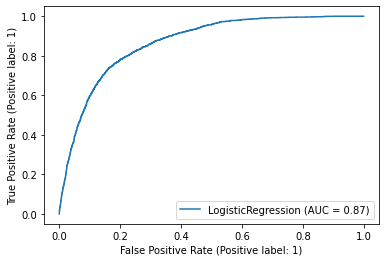

In [196]:
# Evaluation Metric
from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix, f1_score
#logistic_regression.score(x_test,y_test) # accuracy
#confusion_matrix(y_test,y_pred)
f1_score(y_test,y_pred) # f1 score
plot_roc_curve(logistic_regression, x_test, y_test) #AUROC
accuracy_score(y_test,y_pred) #accuracy

In [197]:
logistic_regression.score(x_test,y_test) # accuracy


0.7397139065034656

In [198]:
confusion_matrix(y_test,y_pred)


array([[8692, 3283],
       [ 247, 1340]])

In [199]:
accuracy_score(y_test,y_pred) #accuracy

0.7397139065034656

**2. KNN classification **

In [200]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation

In [201]:
knn = KNeighborsClassifier(4)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)


0.8350538268691934

In [202]:
for i in [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(x_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10, scoring = "roc_auc"))) #predicting using the model



K value  :  1  train score :  1.0  cv score :  0.9613451309859109
K value  :  2  train score :  0.9939974457215837  cv score :  0.9700663360134492
K value  :  3  train score :  0.9756704980842912  cv score :  0.9740879380538395
K value  :  4  train score :  0.9752447850149  cv score :  0.9767824416527041
K value  :  5  train score :  0.9659003831417624  cv score :  0.9782017846803612
K value  :  6  train score :  0.9653469561515539  cv score :  0.9793548196056054
K value  :  7  train score :  0.9586419753086419  cv score :  0.9794090474062781
K value  :  8  train score :  0.9579395487441464  cv score :  0.9795306946669846
K value  :  9  train score :  0.952767134951043  cv score :  0.9791320648549767
K value  :  10  train score :  0.9512771392081737  cv score :  0.978778776942125
K value  :  12  train score :  0.9466581524052788  cv score :  0.9780585416194784
K value  :  13  train score :  0.9441251596424011  cv score :  0.9777428991014361
K value  :  14  train score :  0.942209450830

In [203]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)


0.8182421471759328

In [204]:
predictions=knn.predict(x_test)

In [205]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,predictions)
KNN_roc_auc=auc(fpr,tpr)
print("KNN ROC_AUC:",KNN_roc_auc)

KNN ROC_AUC: 0.8238311805339047


**3.Decision Tree**

In [206]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier()
# Fit dt to the training set
dt.fit(x_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split
# Predict test set labels
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

Test set accuracy: 0.85
0.7780100582367435


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


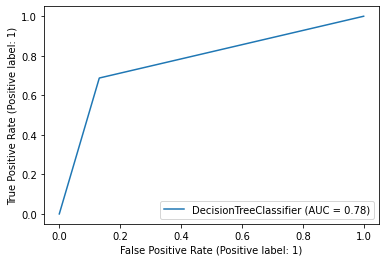

In [207]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily
# Predict test set labels
y_pred = dt.predict(x_test) # Model's predictions
# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
Dec_Tree_AUROC = roc_auc_score(y_test, y_pred)
print(Dec_Tree_AUROC)
plot_roc_curve(dt, x_test, y_test)
#Dec_Tree_AUROC = roc_auc_score(y_train, dt.predict(x_train))
#print("Train set KNN AUROC : ", Dec_Tree_AUROC)


4.Voting classifier 

In [208]:
from sklearn.ensemble import VotingClassifier # this is the function that ensembles my model
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model3 = KNeighborsClassifier(3)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('knn',model3)], voting='soft') # it will stitich all the models together, voting = hard means max voting 
# we need to give the list of models that we are trying to combine
model.fit(x_train,y_train) # to train all of the models
preds = model.predict(x_test)
print("model score voting classifier:",model.score(x_test,y_test)) # prediction
#roc_auc_score(y_test,model.predict_proba(x_test)[:,1])

model score voting classifier: 0.8389618050435039


In [209]:
voting_classifier_AUROC=roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
print("voting classifier:",roc_auc_score(y_test,model.predict_proba(x_test)[:,1]))

voting classifier: 0.8938166180593102


In [210]:
import time
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(x_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 81.14
Time consumed for training: 0.089 seconds
Time consumed for prediction: 3.19636 seconds


**Random Forest**

In [211]:
df.to_csv("ran_forest.csv")

In [212]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)


RandomForestClassifier()

In [213]:
y_pred = rf.predict(x_test)

In [214]:
accuracy = accuracy_score(y_test, y_pred)
print("Random forest Accuracy:", accuracy)

Random forest Accuracy: 0.8714791328712579


In [215]:
from sklearn.metrics import roc_auc_score, roc_curve
Ran_forest_AUROC=roc_auc_score(y_test, y_pred)
print('Area under curve score for Random Forests is: ', roc_auc_score(y_test, y_pred))

Area under curve score for Random Forests is:  0.8162610616267613


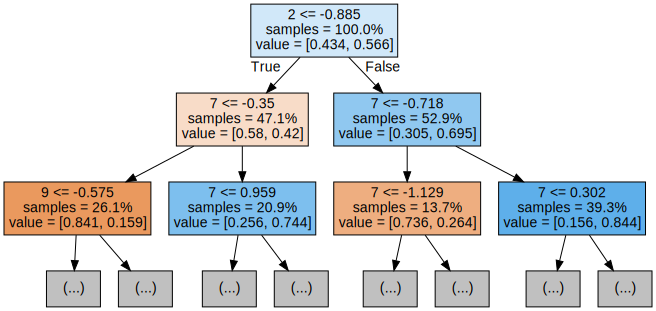

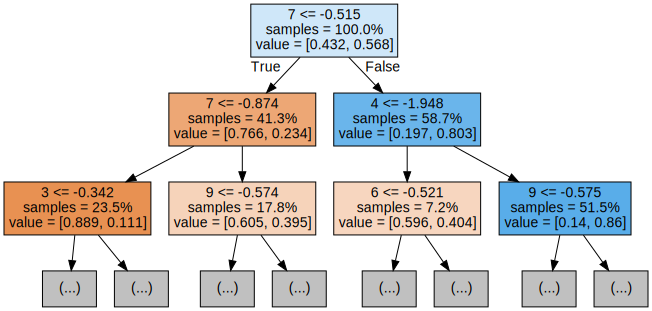

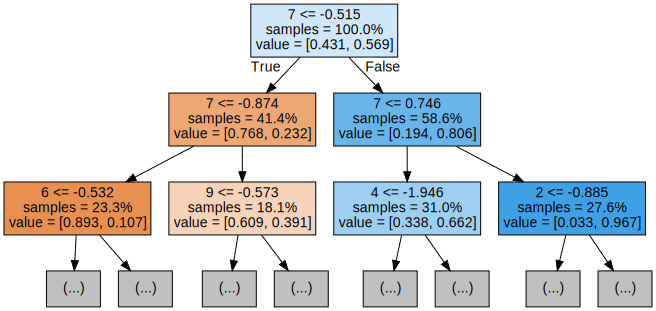

In [216]:
# Export the first three decision trees from the forest
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=pd.DataFrame(x_train).columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [217]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(x_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 87.26
Time consumed for training: 0.707 seconds
Time consumed for prediction: 0.03091 seconds


XGBoost

In [218]:
from xgboost import XGBClassifier
model = XGBClassifier( n_estimators=100)
model.fit(x_train,y_train) #train the model
model.score(x_test, y_test) # scoring the model - r2 squared

0.8842353635157056

In [219]:
y_pred = model.predict(x_test)

In [220]:
accuracy = accuracy_score(y_test, y_pred)
print("Model acuracy XGBoost:",accuracy)

Model acuracy XGBoost: 0.8842353635157056


In [221]:
from sklearn.metrics import roc_auc_score
y_pred = model.predict_proba(x_test)[:,1]
XGBoost_AUROC=roc_auc_score(y_test,y_pred)
print("XGBoost AUROC :",roc_auc_score(y_test,y_pred))

XGBoost AUROC : 0.9198857102264879


In [222]:
from xgboost import XGBClassifier
import time
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(x_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 88.42
Time consumed for training: 5.556
Time consumed for prediction: 0.02875 seconds


In [223]:
results = pd.DataFrame({
    'Model': ["Logistic Regression",'KNN','XGBoost', 'Random Forest','Voting_classifier','Decision Tree'],
    'Score': [Log_reg_AUROC,KNN_roc_auc,XGBoost_AUROC,Ran_forest_AUROC,voting_classifier_AUROC,Dec_Tree_AUROC]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
XGBoost,0.919886
Voting_classifier,0.893817
Logistic Regression,0.866815
KNN,0.823831
Random Forest,0.816261
Decision Tree,0.778010


In [224]:
importances = pd.DataFrame({
    'Feature': df.drop('target', axis=1).columns,
    'Importance': xgb.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
prev_outcome,0.252345
call_type,0.204440
dur,0.156222
education_qual,0.155556
num_calls,0.057370
mon,0.054616
marital,0.052421
job,0.032479
age,0.019683


<AxesSubplot:xlabel='Feature'>

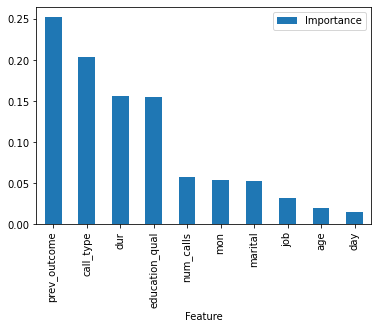

In [225]:
importances.plot.bar()

After fitting all classification algorithms, we found that XGBoost give good AUROC score nearly 0.92